In [ ]:
# Step 1: Unzip the uploaded file
import zipfile
import os

zip_path = "/content/archive (4).zip"  # Replace with your uploaded file name
extract_path = "/content/extracted_data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Check the extracted files
import os
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


/content/extracted_data/o2Saturation.csv
/content/extracted_data/heart.csv


In [ ]:
import pandas as pd

data_path = "/content/archive (4).zip"  # Replace with your actual file path
df = pd.read_csv(data_path)

# Step 4: Separate data and target
X = df.drop('output', axis=1)   # Replace 'target' with your actual target column name
y = df['output']

# Optional: Display shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (303, 13)
y shape: (303,)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df.drop_duplicates(inplace=True,keep='first')

number of people having sex as 1 are 206 and number of people having sex as 0 are 96


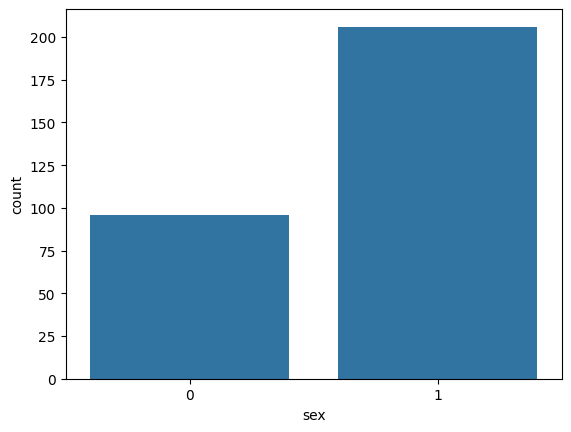

In [15]:
x=(df.sex.value_counts())
print(f'number of people having sex as 1 are {x[1]} and number of people having sex as 0 are {x[0]}')
p=sns.countplot(data=df,x='sex')
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


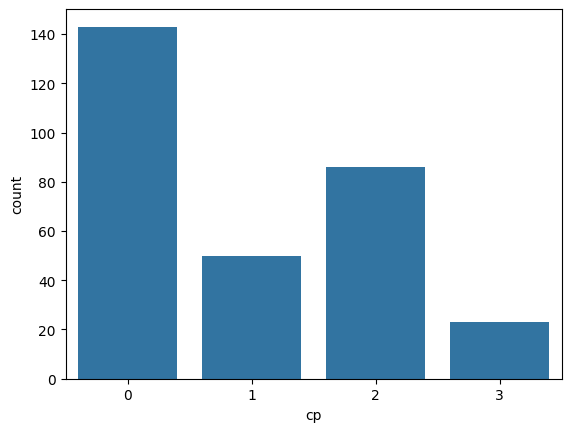

In [16]:
x=(df.cp.value_counts())
print(x)
p=sns.countplot(data=df,x='cp')
plt.show()

<Figure size 1000x1000 with 0 Axes>

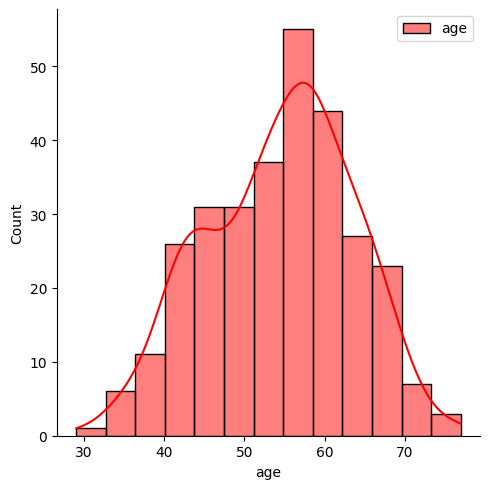

In [20]:
plt.figure(figsize=(10,10))
sns.displot(df.age,color='red',label='age',kde=True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

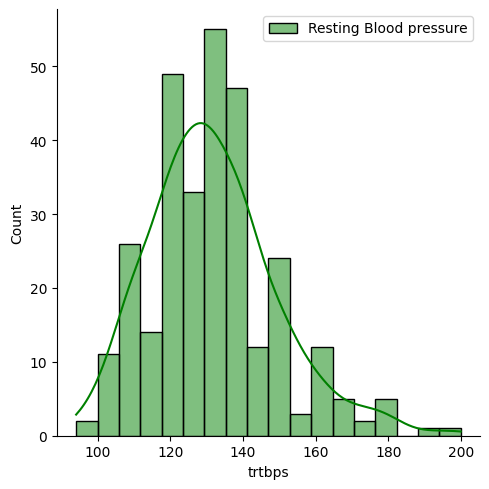

In [21]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps,color='green',label='Resting Blood pressure',kde=True)
plt.legend()

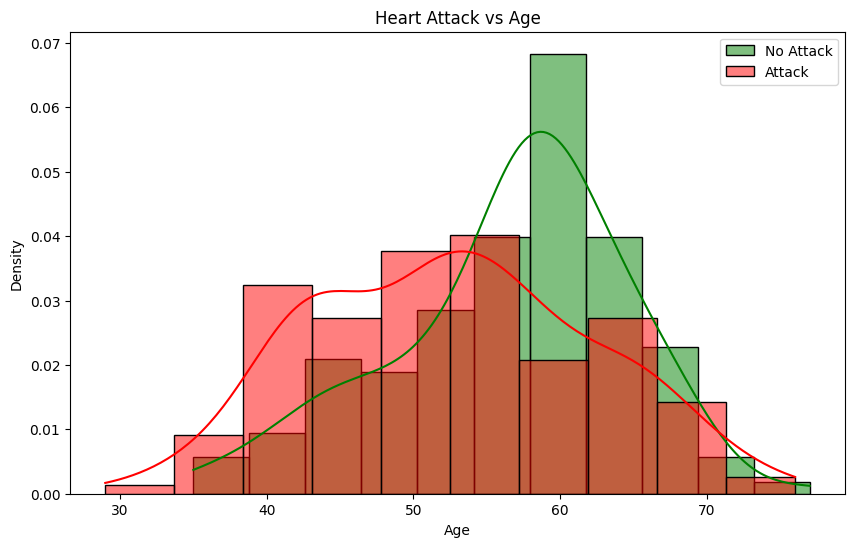

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['output'] == 0]['age'], color='green', kde=True, label='No Attack', stat='density')
sns.histplot(df[df['output'] == 1]['age'], color='red', kde=True, label='Attack', stat='density')
plt.title("Heart Attack vs Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

In [26]:
y=df.iloc[:,-1].values
x=df.iloc[:,1:-1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [31]:
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.868421052631579